In [167]:
import numpy as np 
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns

In [168]:
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')
df_temp = df.copy()
df2 = pd.read_csv('FAOSTAT_data_11-24-2020.csv')

In [169]:
df_temp

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,0.030,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,2.414,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,1.277,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,'198,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,'198,OECD,7019,SepOctNov,7271,Temperature change,°C,0.044,0.467,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,5873,'198,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,5873,'198,OECD,7020,Meteorological year,7271,Temperature change,°C,0.169,-0.008,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [170]:
df2

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN
...,...,...,...,...,...,...,...
316,246,Yemen Ar Rp,886.0,NaN,NaN,NaN,NaN
317,247,Yemen Dem,720.0,NaN,NaN,NaN,NaN
318,248,Yugoslav SFR,890.0,NaN,NaN,NaN,1991.0
319,251,Zambia,894.0,ZM,ZMB,NaN,NaN


In [171]:
df_temp = df_temp.dropna()
df_temp

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,0.030,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,2.414,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,1.277,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,'198,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,'198,OECD,7019,SepOctNov,7271,Temperature change,°C,0.044,0.467,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,5873,'198,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,5873,'198,OECD,7020,Meteorological year,7271,Temperature change,°C,0.169,-0.008,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [172]:
print(f"Shape of the dataframe: {df_temp.shape[0]} rows and {df_temp.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_temp.columns)
df_temp.head()

Shape of the dataframe: 6812 rows and 70 columns.

Columns in this dataframe:
 Index(['Area Code', 'Area Code (M49)', 'Area', 'Months Code', 'Months',
       'Element Code', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964',
       'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
       'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
       'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988',
       'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
       'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021', 'Y2022'],
      dtype='object')


,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,0.030,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,2.414,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,1.277,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598


In [173]:


# bazı sütünlar silindi
df_temp.drop(columns=['Area Code','Area Code (M49)', 'Months Code', 'Element Code'], inplace=True)

# Y leri sil
df_temp.rename(columns={x:x[1:] for x in df_temp.columns if 'Y' in x}, inplace=True)

# area countrname ile Months month ile değiştirildi
df_temp.rename(columns={'Area': 'country_name', 'Months':'months'}, inplace=True)

In [174]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,JunJulAug,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,SepOctNov,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,OECD,SepOctNov,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [175]:
df_temp.loc[(df_temp["country_name"] == "Türkiye") & (df_temp["Element"] == "Temperature change")]


,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
7582,Türkiye,January,Temperature change,°C,0.113,0.959,2.321,-4.269,0.307,3.147,...,1.442,2.943,0.971,0.103,-1.329,2.680,1.350,0.966,2.982,-0.275
7584,Türkiye,February,Temperature change,°C,-0.799,-0.062,2.528,-1.394,-1.538,3.638,...,2.636,2.804,1.522,4.431,0.055,4.029,1.879,1.085,2.586,1.811
7586,Türkiye,March,Temperature change,°C,-1.131,2.459,-1.654,0.565,0.691,1.107,...,2.127,2.743,1.360,2.539,2.054,4.545,1.181,2.810,0.206,-2.725
7588,Türkiye,April,Temperature change,°C,1.248,-0.269,-0.514,-0.811,-1.194,1.294,...,1.663,2.048,-0.702,3.254,0.458,3.290,-0.281,0.351,1.718,2.560
7590,Türkiye,May,Temperature change,°C,0.862,0.919,-1.215,-1.241,-0.592,-0.505,...,2.478,0.958,1.065,0.613,0.544,2.480,2.128,1.087,2.881,0.301
7592,Türkiye,June,Temperature change,°C,0.423,0.443,-0.322,0.283,0.605,-0.013,...,1.451,0.872,-2.138,2.119,1.473,1.899,3.054,1.072,1.178,1.958
7594,Türkiye,July,Temperature change,°C,-0.071,0.787,0.052,-0.391,-0.179,0.660,...,0.818,1.706,1.500,1.734,2.259,2.051,0.681,2.231,2.499,1.095
7596,Türkiye,August,Temperature change,°C,0.360,1.220,0.491,-1.248,-0.199,1.093,...,1.188,2.506,-4.028,2.643,2.313,2.027,1.738,1.386,2.311,2.706
7598,Türkiye,September,Temperature change,°C,-1.956,0.696,0.703,-0.698,0.518,-0.211,...,0.345,1.191,3.747,0.749,3.206,2.352,1.445,4.278,0.743,2.179
7600,Türkiye,October,Temperature change,°C,-0.198,0.794,0.774,0.534,-2.795,2.026,...,-1.000,0.796,1.632,1.261,0.276,2.058,3.094,4.054,0.549,1.809


In [176]:
df_temp_info= pd.DataFrame({"Dtype": df_temp.dtypes, 
                            "Unique values": df_temp.nunique(),
                            "Missing values(%)": round(df_temp.isnull().sum()/df_temp.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

df_temp_info

,Dtype,Unique values,Missing values(%)
Columns,,,
country_name,object,209,0.0
months,object,17,0.0
Element,object,2,0.0
Unit,object,1,0.0
1961,float64,2449,0.0
...,...,...,...
2018,float64,2373,0.0
2019,float64,2375,0.0
2020,float64,2472,0.0


In [177]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,JunJulAug,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,SepOctNov,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,OECD,SepOctNov,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [178]:
# hangi index te boş satır var bakılıyor, yokmuş
index_nan = df_temp.loc[df_temp.isnull().any(axis=1), '1961':].index


df_temp.drop(index_nan, inplace=True)
index_nan

Int64Index([], dtype='int64')

In [179]:
# duplicated var mmı yokmuş
df_temp.loc[df_temp.duplicated()]

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


In [180]:
# oecd ülkelerinde bu format var
df_temp.months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# china_index = df_temp.loc[df_temp.country_name == 'China'].index

# df_temp.drop(china_index, inplace=True)

# df_temp.reset_index(drop=True, inplace=True)

In [181]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,Summer,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,Fall,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,OECD,Fall,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [182]:
df2

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
0,2,Afghanistan,4.0,AF,AFG,NaN,NaN
1,5100,Africa,2.0,NaN,X06,NaN,NaN
2,284,Åland Islands,248.0,NaN,ALA,NaN,NaN
3,3,Albania,8.0,AL,ALB,NaN,NaN
4,4,Algeria,12.0,DZ,DZA,NaN,NaN
...,...,...,...,...,...,...,...
316,246,Yemen Ar Rp,886.0,NaN,NaN,NaN,NaN
317,247,Yemen Dem,720.0,NaN,NaN,NaN,NaN
318,248,Yugoslav SFR,890.0,NaN,NaN,NaN,1991.0
319,251,Zambia,894.0,ZM,ZMB,NaN,NaN


In [183]:
df2.loc[df2["Country"]=="Turkey", "Country"] = "Türkiye"

In [184]:
df2.loc[df2["Country"]=="Turkey"]

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year


In [185]:
df2.loc[df2["Country"]=="Türkiye"]

,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code,Start Year,End Year
288,223,Türkiye,792.0,TR,TUR,NaN,NaN


In [186]:
# df2 de ilgili sütunlar kaldırıldı ve yeni isimler verildi kalanlara
df2.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

df2.rename(columns={'Country':'country_name','ISO3 Code':'country_code'},inplace=True)

filter_china = df2['country_name'] == 'China, mainland'

df2[filter_china] = df2[filter_china].fillna('CHN') 

In [187]:
df2[filter_china]

,country_name,country_code
61,"China, mainland",CHN


In [188]:
df2

,country_name,country_code
0,Afghanistan,AFG
1,Africa,X06
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
316,Yemen Ar Rp,NaN
317,Yemen Dem,NaN
318,Yugoslav SFR,NaN
319,Zambia,ZMB


In [189]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,OECD,Summer,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,OECD,Fall,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.066,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204
9653,OECD,Fall,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380
9654,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,1.010,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251


In [190]:
# inner join ile sadece eşleşeleri birleştirdik
df_temp = pd.merge(df_temp, df2, how='inner', on='country_name')

In [191]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country_code
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284,AFG
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,AFG
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371,AFG
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,AFG
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773,OECD,Summer,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,NaN
6774,OECD,Fall,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204,NaN
6775,OECD,Fall,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,NaN
6776,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251,NaN


In [192]:
df_temp.loc[df_temp["country_name"] == "OECD", "country_code"] = "OECD"

In [193]:
df_temp

,country_name,months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country_code
0,Afghanistan,January,Temperature change,°C,0.756,0.030,2.716,-5.260,1.834,3.780,...,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284,AFG
1,Afghanistan,January,Standard Deviation,°C,1.964,1.964,1.964,1.964,1.964,1.964,...,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,AFG
2,Afghanistan,February,Temperature change,°C,-1.766,2.414,3.888,-0.236,-0.130,3.514,...,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371,AFG
3,Afghanistan,February,Standard Deviation,°C,2.602,2.602,2.602,2.602,2.602,2.602,...,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,AFG
4,Afghanistan,March,Temperature change,°C,0.458,1.277,0.363,1.618,-0.947,-0.021,...,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773,OECD,Summer,Standard Deviation,°C,0.247,0.247,0.247,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,OECD
6774,OECD,Fall,Temperature change,°C,0.044,0.467,0.667,-0.152,-0.197,-0.292,...,1.036,1.708,1.555,1.226,0.598,1.247,1.400,1.582,1.204,OECD
6775,OECD,Fall,Standard Deviation,°C,0.380,0.380,0.380,0.380,0.380,0.380,...,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,0.380,OECD
6776,OECD,Meteorological year,Temperature change,°C,0.169,-0.008,0.140,-0.186,-0.381,-0.163,...,0.849,1.313,1.880,1.379,1.106,1.314,1.451,1.464,1.251,OECD


In [194]:
df_temp.melt(

    id_vars=["country_code", "country_name", "months","Element","Unit"], 
    value_vars=[str(n) for n in range(1961, 2022+1)], 
    var_name="years", 
    value_name="temp_changes")

,country_code,country_name,months,Element,Unit,years,temp_changes
0,AFG,Afghanistan,January,Temperature change,°C,1961,0.756
1,AFG,Afghanistan,January,Standard Deviation,°C,1961,1.964
2,AFG,Afghanistan,February,Temperature change,°C,1961,-1.766
3,AFG,Afghanistan,February,Standard Deviation,°C,1961,2.602
4,AFG,Afghanistan,March,Temperature change,°C,1961,0.458
...,...,...,...,...,...,...,...
420231,OECD,OECD,Summer,Standard Deviation,°C,2022,0.247
420232,OECD,OECD,Fall,Temperature change,°C,2022,1.204
420233,OECD,OECD,Fall,Standard Deviation,°C,2022,0.380
420234,OECD,OECD,Meteorological year,Temperature change,°C,2022,1.251


In [195]:
# melt fonksiyonu içinde id_vars ile değişmeyen sutunları belirttik
# value_vars: Dönüşüm sonucu oluşacak 'years' ve 'temp_changes' sütunları 
# için değerlerin hangi sütunlardan alınacağı belirtilir. 
# Bu sütunlar, 1961'den 2019'a kadar olan yılları temsil eder.
# var_name: Dönüşüm sonucu oluşan 'years' ve 'temp_changes' sütunlarının adını belirtir.
# value_name: Dönüşüm sonucu oluşan 'temp_changes' sütunundaki değerlerin adını belirtir.
    
df_temp = df_temp.melt(

    id_vars=["country_code", "country_name", "months","Element","Unit"], 
    value_vars=[str(n) for n in range(1961, 2022+1)], 
    var_name="years", 
    value_name="temp_changes")

df_temp

,country_code,country_name,months,Element,Unit,years,temp_changes
0,AFG,Afghanistan,January,Temperature change,°C,1961,0.756
1,AFG,Afghanistan,January,Standard Deviation,°C,1961,1.964
2,AFG,Afghanistan,February,Temperature change,°C,1961,-1.766
3,AFG,Afghanistan,February,Standard Deviation,°C,1961,2.602
4,AFG,Afghanistan,March,Temperature change,°C,1961,0.458
...,...,...,...,...,...,...,...
420231,OECD,OECD,Summer,Standard Deviation,°C,2022,0.247
420232,OECD,OECD,Fall,Temperature change,°C,2022,1.204
420233,OECD,OECD,Fall,Standard Deviation,°C,2022,0.380
420234,OECD,OECD,Meteorological year,Temperature change,°C,2022,1.251


In [200]:
df_temp.loc[df_temp["country_code"]=="TUR"]

,country_code,country_name,months,Element,Unit,years,temp_changes
5058,TUR,Türkiye,January,Temperature change,°C,1961,0.113
5059,TUR,Türkiye,January,Standard Deviation,°C,1961,2.086
5060,TUR,Türkiye,February,Temperature change,°C,1961,-0.799
5061,TUR,Türkiye,February,Standard Deviation,°C,1961,2.331
5062,TUR,Türkiye,March,Temperature change,°C,1961,-1.131
...,...,...,...,...,...,...,...
418545,TUR,Türkiye,Summer,Standard Deviation,°C,2022,0.535
418546,TUR,Türkiye,Fall,Temperature change,°C,2022,2.010
418547,TUR,Türkiye,Fall,Standard Deviation,°C,2022,0.916
418548,TUR,Türkiye,Meteorological year,Temperature change,°C,2022,1.244


In [201]:
# her üldede her yıl için meteorological year var, yılın ort gibi. Eşleşenleri aldık 
# bazı country code değerleri nan çünkü afrika,asya, düşük gelirli ülke gibi başlıkları var, bunları attık
# met_year da ilgili sütunları aldık



met_year = df_temp[(df_temp.months == 'Meteorological year') & (df_temp.Element == 'Temperature change')]
met_year = met_year.dropna()
met_year = met_year.reset_index()
met_year = met_year.drop(columns="index")
met_year

,country_code,country_name,months,Element,Unit,years,temp_changes
0,AFG,Afghanistan,Meteorological year,Temperature change,°C,1961,-0.113
1,ALB,Albania,Meteorological year,Temperature change,°C,1961,0.627
2,DZA,Algeria,Meteorological year,Temperature change,°C,1961,0.164
3,AND,Andorra,Meteorological year,Temperature change,°C,1961,0.736
4,AGO,Angola,Meteorological year,Temperature change,°C,1961,0.041
...,...,...,...,...,...,...,...
10473,ZWE,Zimbabwe,Meteorological year,Temperature change,°C,2022,-0.490
10474,X01,World,Meteorological year,Temperature change,°C,2022,1.394
10475,X06,Africa,Meteorological year,Temperature change,°C,2022,1.008
10476,X21,Americas,Meteorological year,Temperature change,°C,2022,1.049


In [202]:
met_year.loc[met_year["country_name"]=="Türkiye"]

,country_code,country_name,months,Element,Unit,years,temp_changes
150,TUR,Türkiye,Meteorological year,Temperature change,°C,1961,0.188
319,TUR,Türkiye,Meteorological year,Temperature change,°C,1962,1.045
488,TUR,Türkiye,Meteorological year,Temperature change,°C,1963,0.489
657,TUR,Türkiye,Meteorological year,Temperature change,°C,1964,-0.721
826,TUR,Türkiye,Meteorological year,Temperature change,°C,1965,-0.345
...,...,...,...,...,...,...,...
9783,TUR,Türkiye,Meteorological year,Temperature change,°C,2018,2.596
9952,TUR,Türkiye,Meteorological year,Temperature change,°C,2019,1.651
10121,TUR,Türkiye,Meteorological year,Temperature change,°C,2020,1.842
10290,TUR,Türkiye,Meteorological year,Temperature change,°C,2021,1.872


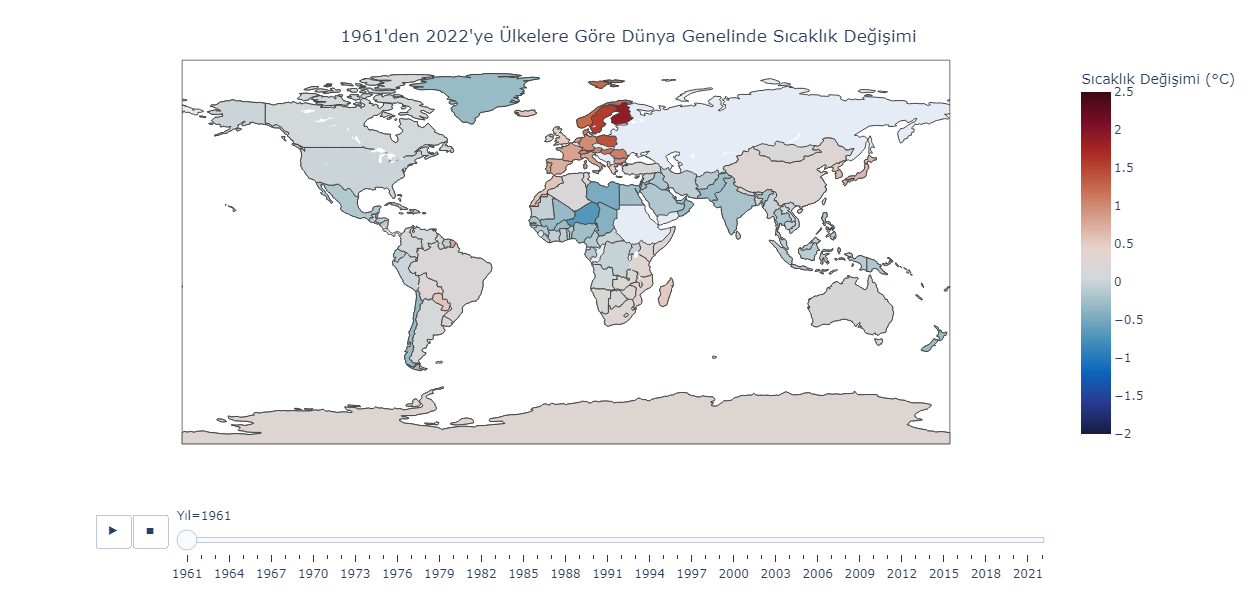

In [203]:
fig = px.choropleth(
    met_year,
    locations='country_code',
    animation_frame='years',

    color='temp_changes',
    color_continuous_scale='balance',
    range_color=[-2, 2.5],

    hover_name='country_name',
    hover_data=dict(country_code=None),
    
    labels=dict(
        years='Yıl',
        temp_changes="Sıcaklık Değişimi (°C)"))

fig.update_layout(    
    title = "1961'den 2022'ye Ülkelere Göre Dünya Genelinde Sıcaklık Değişimi",
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    dragmode=False,

    width=1000,
    height=600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 500
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 8

fig.show()

In [206]:
world = df_temp.country_name == 'World'

months = df_temp.months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

temp_change = df_temp.Element == 'Temperature change'

montly_variations = df_temp.loc[months & world & temp_change, ['months', 'years', 'temp_changes']].reset_index(drop=True)
montly_variations

,months,years,temp_changes
0,January,1961,0.398
1,February,1961,0.262
2,March,1961,0.259
3,April,1961,0.284
4,May,1961,0.373
...,...,...,...
739,August,2022,1.382
740,September,2022,1.255
741,October,2022,1.506
742,November,2022,1.048


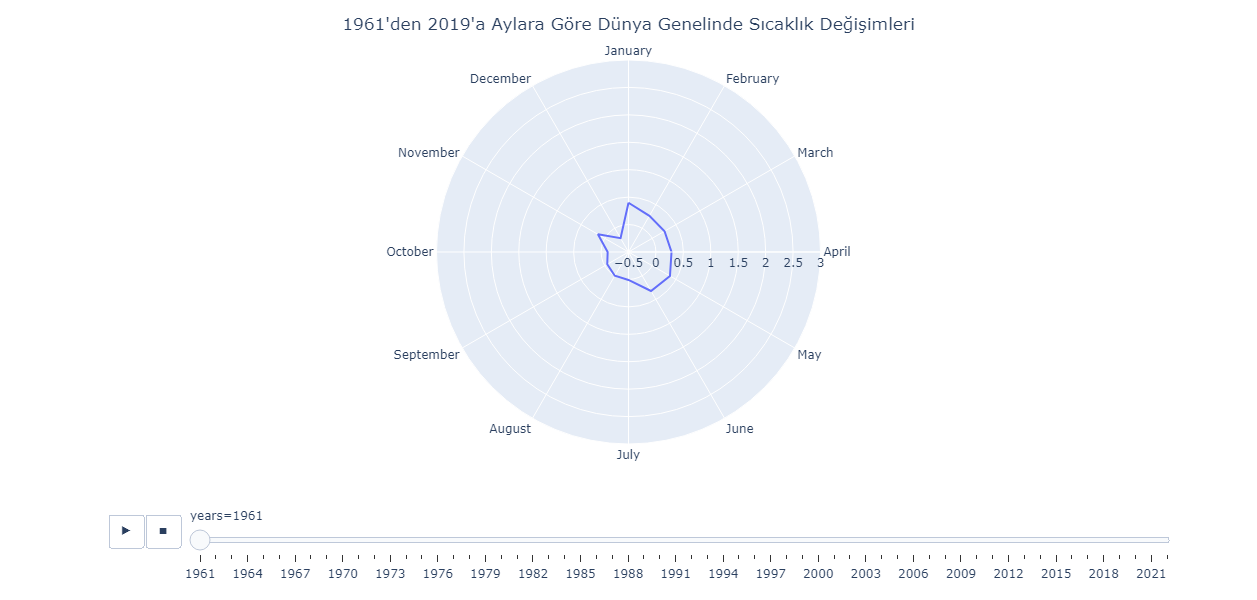

In [207]:
fig = px.line_polar(
    montly_variations, 
    r='temp_changes',
    theta='months',

    animation_frame='years',
    line_close=True)

labels=dict(
        years='Yıl')

fig.update_layout(
    width=600,
    height=600,

    title="1961'den 2022'ye Aylara Göre Dünya Genelinde Sıcaklık Değişimleri",
    title_x = 0.5,
    title_y = 0.97,
    title_xanchor='center',
    title_yanchor='top',

    polar=dict(radialaxis=dict(range=[-0.5, 3])))

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

In [157]:
df_temp2 = df_temp

In [158]:
MonthV={'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12',
       'Summer':'13', 'Spring':'14', 'Meteorological year':'15', 'Fall':'16', 'Winter':'17'}
df_temp2=df_temp2.replace(MonthV)

df_temp2.head()

,country_code,country_name,months,years,temp_changes
0,AFG,Afghanistan,1,1961,0.777
1,AFG,Afghanistan,2,1961,-1.743
2,AFG,Afghanistan,3,1961,0.516
3,AFG,Afghanistan,4,1961,-1.709
4,AFG,Afghanistan,5,1961,1.412


In [159]:
df_temp2=df_temp2.loc[df_temp2.months.isin(['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12'])]

In [160]:
bölgeler=df_temp2[df_temp2.country_name.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]

df_temp2=df_temp2[~df_temp2.country_name.isin(['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD'])]
df_temp2

,country_code,country_name,months,years,temp_changes
0,AFG,Afghanistan,1,1961,0.777
1,AFG,Afghanistan,2,1961,-1.743
2,AFG,Afghanistan,3,1961,0.516
3,AFG,Afghanistan,4,1961,-1.709
4,AFG,Afghanistan,5,1961,1.412
...,...,...,...,...,...
193640,ZWE,Zimbabwe,8,2019,1.882
193641,ZWE,Zimbabwe,9,2019,0.059
193642,ZWE,Zimbabwe,10,2019,2.009
193643,ZWE,Zimbabwe,11,2019,2.448


In [161]:
df_temp2

,country_code,country_name,months,years,temp_changes
0,AFG,Afghanistan,1,1961,0.777
1,AFG,Afghanistan,2,1961,-1.743
2,AFG,Afghanistan,3,1961,0.516
3,AFG,Afghanistan,4,1961,-1.709
4,AFG,Afghanistan,5,1961,1.412
...,...,...,...,...,...
193640,ZWE,Zimbabwe,8,2019,1.882
193641,ZWE,Zimbabwe,9,2019,0.059
193642,ZWE,Zimbabwe,10,2019,2.009
193643,ZWE,Zimbabwe,11,2019,2.448


In [162]:
# Tüm dünya ort
ortdünya=df_temp2.groupby(['years'],as_index=False).mean()

# Tüm ülke ort
ortülke=df_temp2.groupby(['country_name','years'],as_index=False).mean()

In [163]:
df_temp2.value_counts("months")

months
3     9735
2     9617
12    9440
4     9440
9     9440
10    9381
11    9322
5     9322
1     9263
6     9263
8     9204
7     9145
dtype: int64

In [164]:
df_temp2

,country_code,country_name,months,years,temp_changes
0,AFG,Afghanistan,1,1961,0.777
1,AFG,Afghanistan,2,1961,-1.743
2,AFG,Afghanistan,3,1961,0.516
3,AFG,Afghanistan,4,1961,-1.709
4,AFG,Afghanistan,5,1961,1.412
...,...,...,...,...,...
193640,ZWE,Zimbabwe,8,2019,1.882
193641,ZWE,Zimbabwe,9,2019,0.059
193642,ZWE,Zimbabwe,10,2019,2.009
193643,ZWE,Zimbabwe,11,2019,2.448


In [165]:
y=df_temp2['temp_changes']
X=df_temp2.drop(columns=['country_code','country_name','months','temp_changes'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)

In [166]:
X

,years
0,1961
1,1961
2,1961
3,1961
4,1961
...,...
193640,2019
193641,2019
193642,2019
193643,2019


In [167]:
y

0         0.777
1        -1.743
2         0.516
3        -1.709
4         1.412
          ...  
193640    1.882
193641    0.059
193642    2.009
193643    2.448
193644    2.083
Name: temp_changes, Length: 112572, dtype: float64

In [168]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LRpreds = LR.predict(X_valid)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, LRpreds)))

RMSE: 1.0074482554470836


In [169]:
LR.fit(X, y)

LinearRegression()

In [179]:
LR_test=pd.DataFrame({'years':np.random.randint(1980,2060, size=1000)})
LR_test=LR_test.sort_values(by=['years']).reset_index(drop=True).astype(str)
LR_test

,years
0,1980
1,1980
2,1980
3,1980
4,1980
...,...
995,2059
996,2059
997,2059
998,2059


In [171]:
preds_test = LR.predict(LR_test)
LR_test['temp_changes']=pd.Series(preds_test, index=LR_test.index)

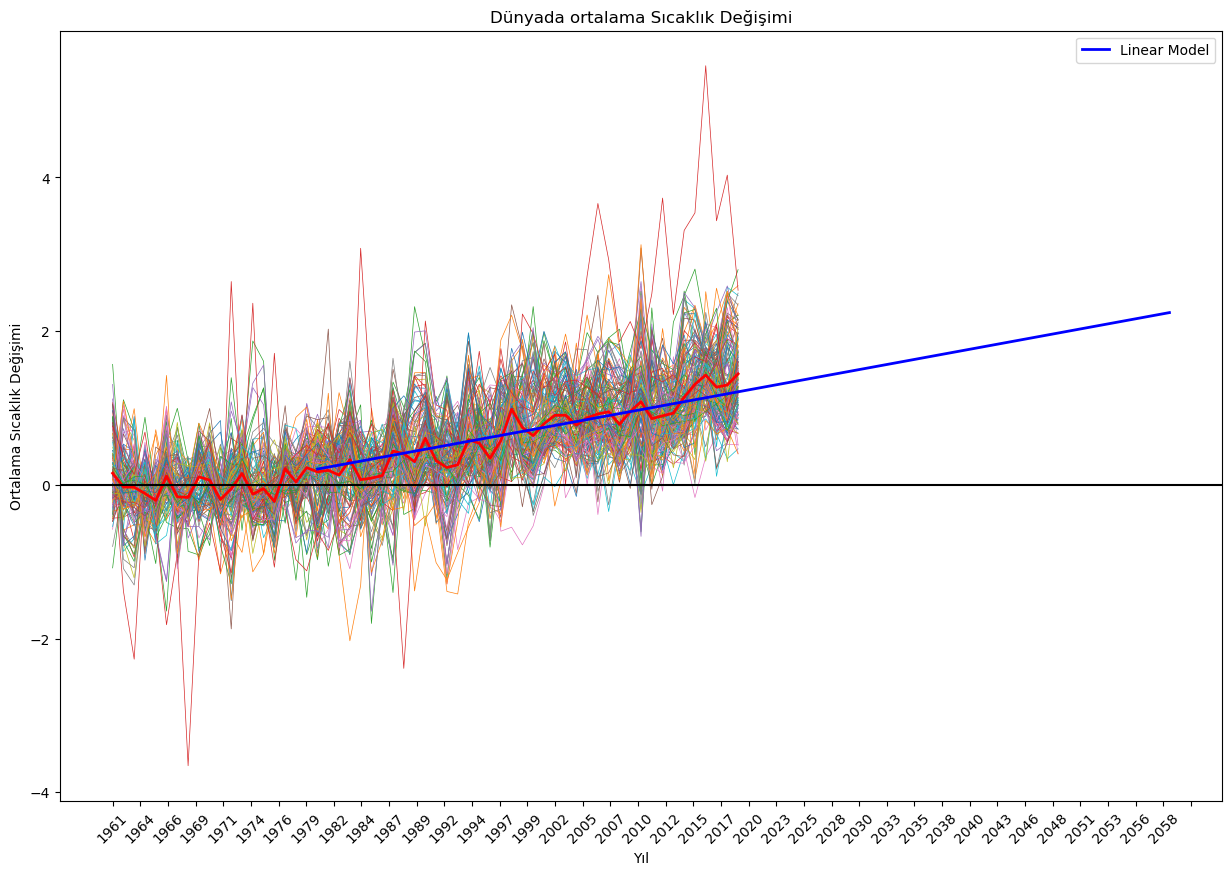

In [172]:
plt.figure(figsize=(15,10))
for i in ortülke.country_name.unique():
    plt.plot(ortülke.years.loc[ortülke.country_name==str(i)],ortülke.temp_changes.loc[ortülke.country_name==str(i)],linewidth=0.5)

plt.plot(ortdünya.years,ortdünya.temp_changes,'r',linewidth=2.0)
plt.plot(LR_test.years.unique(),LR_test.groupby('years').mean(),'b',linewidth=2.0,label='Linear Model')

plt.axhline(y=0.0, color='k', linestyle='-')
plt.xticks(np.linspace(0,100,40),rotation=45)
plt.xlabel('Yıl')
plt.ylabel('Ortalama Sıcaklık Değişimi')
plt.title('Dünyada ortalama Sıcaklık Değişimi')
plt.legend()
plt.show()

In [173]:
PR_mod = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])


PR_mod.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [174]:
PR_test=pd.DataFrame({'years':np.random.randint(1980,2060, size=1000)})
PR_test=PR_test.sort_values(by=['years']).reset_index(drop=True).astype(str)

In [175]:
pred2_test = PR_mod.predict(PR_test)

PR_test['temp_changes']=pd.Series(pred2_test, index=PR_test.index)

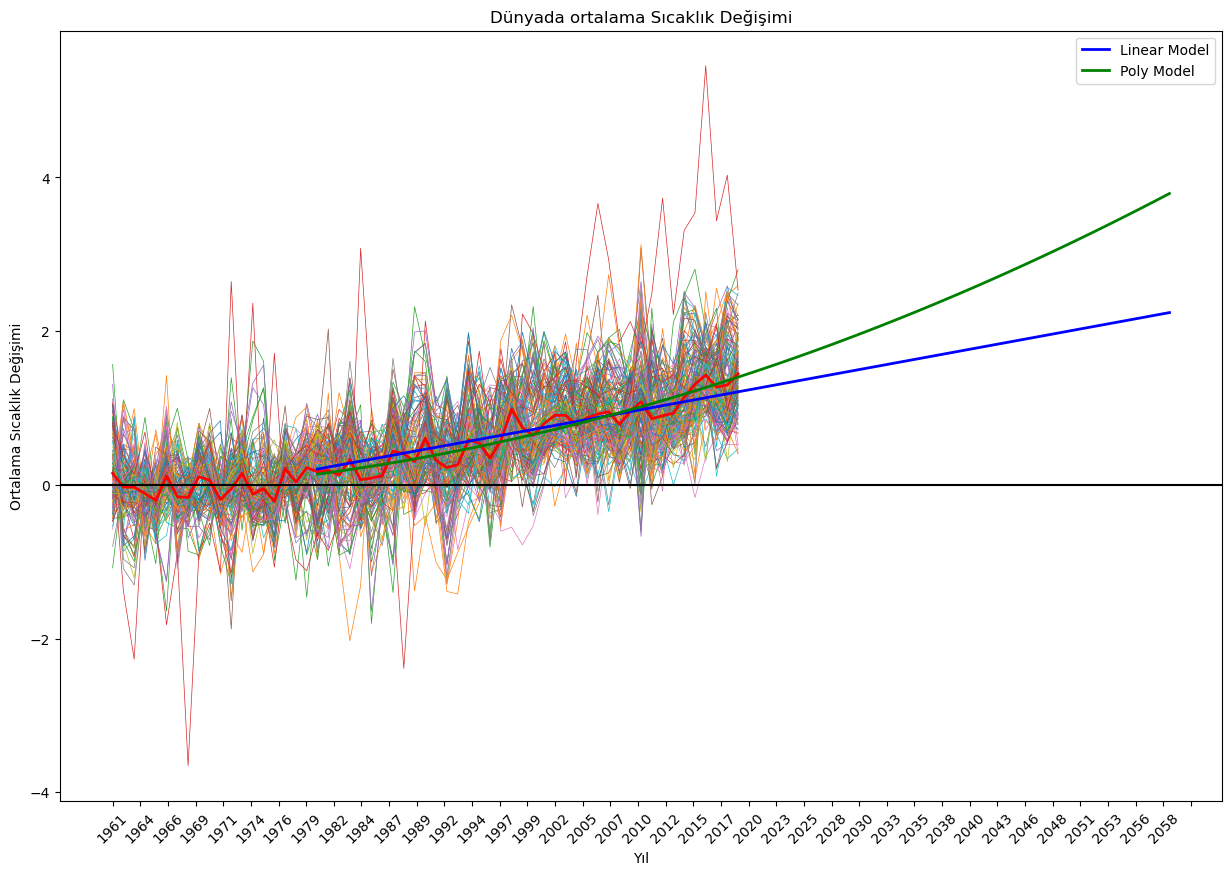

In [176]:
plt.figure(figsize=(15,10))
for i in ortülke.country_name.unique():
    plt.plot(ortülke.years.loc[ortülke.country_name==str(i)],ortülke.temp_changes.loc[ortülke.country_name==str(i)],linewidth=0.5)

plt.plot(ortdünya.years,ortdünya.temp_changes,'r',linewidth=2.0)
plt.plot(LR_test.years.unique(),LR_test.groupby('years').mean(),'b',linewidth=2.0,label='Linear Model')
plt.plot(PR_test.years.unique(),PR_test.groupby('years').mean(),'g',linewidth=2.0,label='Poly Model')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.xticks(np.linspace(0,100,40),rotation=45)
plt.xlabel('Yıl')
plt.ylabel('Ortalama Sıcaklık Değişimi')
plt.title('Dünyada ortalama Sıcaklık Değişimi')
plt.legend()
plt.show()